## Kaggle’s annual Machine Learning and Data Science Survey

In [2]:
import pandas as pd
from matplotlib.colors import rgb2hex
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

df_one = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/kaggle_survey_2021_responses.csv')
df_one

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyze your data (EDA)

### Age Distribution

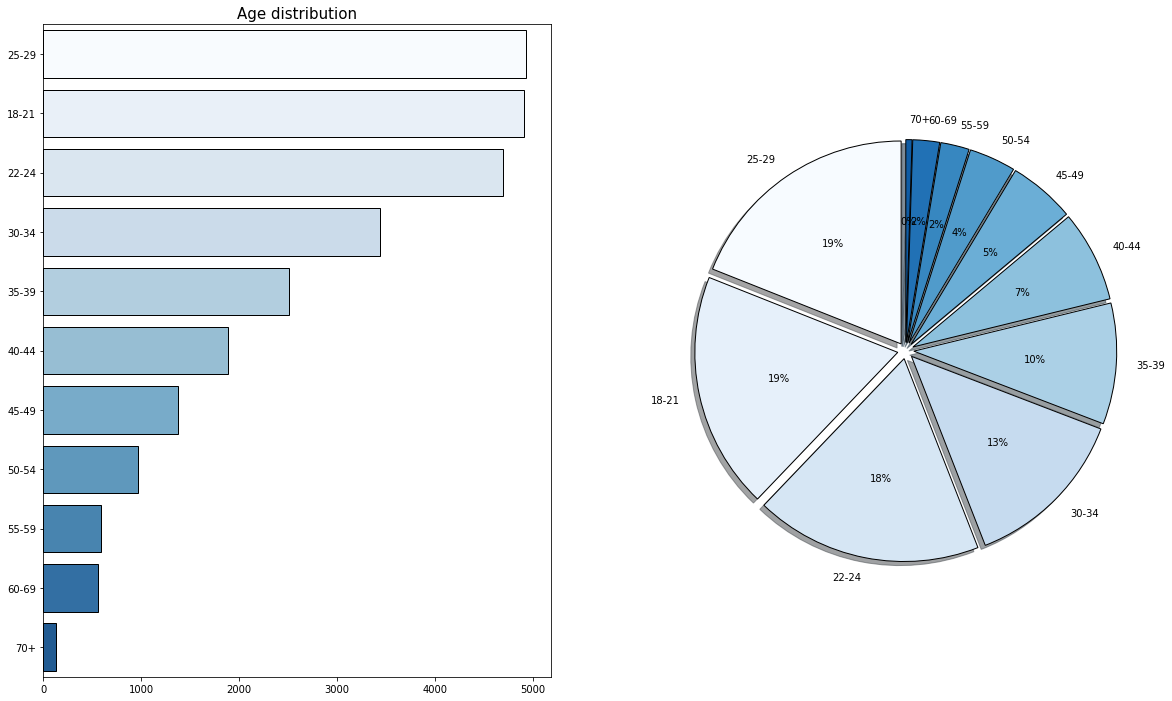

In [3]:
# set the color palette
cmap1 = cm.get_cmap('Blues',13)
colors= []
for i in range(cmap1.N):
    rgb= cmap1(i)[:4]
    colors.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))

# Age Distribution of survey Participants
fig,ax1 = plt.subplots(1,2,figsize=(20,12))
c_age = df_one['Q1'].value_counts().head(11)
sns.barplot(x=c_age.values, y=c_age.index, palette =colors, edgecolor='black', ax=ax1[0])
ax1[0].set_title('Age distribution',fontsize=15)
ax1[1].pie(x=c_age, labels=c_age.index, autopct='%.0f%%', colors=colors, explode=[0.04 for i in c_age.index], shadow=True, startangle = 90,
            wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"})

plt.show()

### Age Distribution by Gender

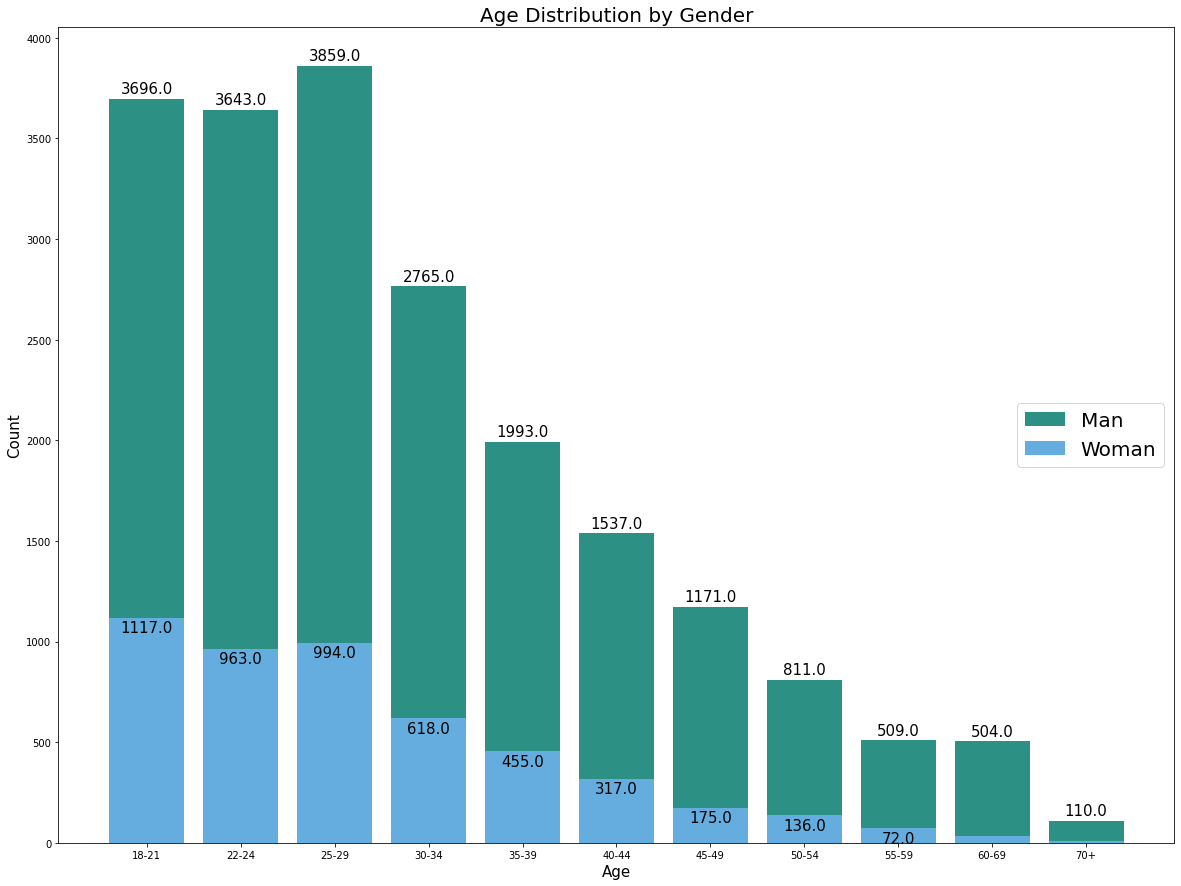

In [4]:
# Age Distribution by Gender
dict1 = {}
for g in df_one['Q2'].value_counts().index:
    dict1[g]= df_one[df_one['Q2']==g]['Q1'].value_counts()
gender_df=pd.DataFrame(dict1)

# plot
figure,ax01=plt.subplots(1,1,figsize=(20,15))
ax01.bar(gender_df.index,gender_df['Man'],color='#2c9184',label='Man')
ax01.bar(gender_df.index,gender_df['Woman'],color='#64ADDE',label='Woman')
for i in gender_df.index:
    ax01.annotate(gender_df['Man'].loc[i],xy=(i,gender_df['Man'].loc[i]+50),ha='center',va='center',fontsize=15)
    ax01.annotate(gender_df['Woman'].loc[i],xy=(i,gender_df['Woman'].loc[i]-50),ha='center',va='center',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Age Distribution by Gender',fontsize=20)
plt.legend(fontsize=20, loc='right')

plt.show()

### Percentage of Man and Woman

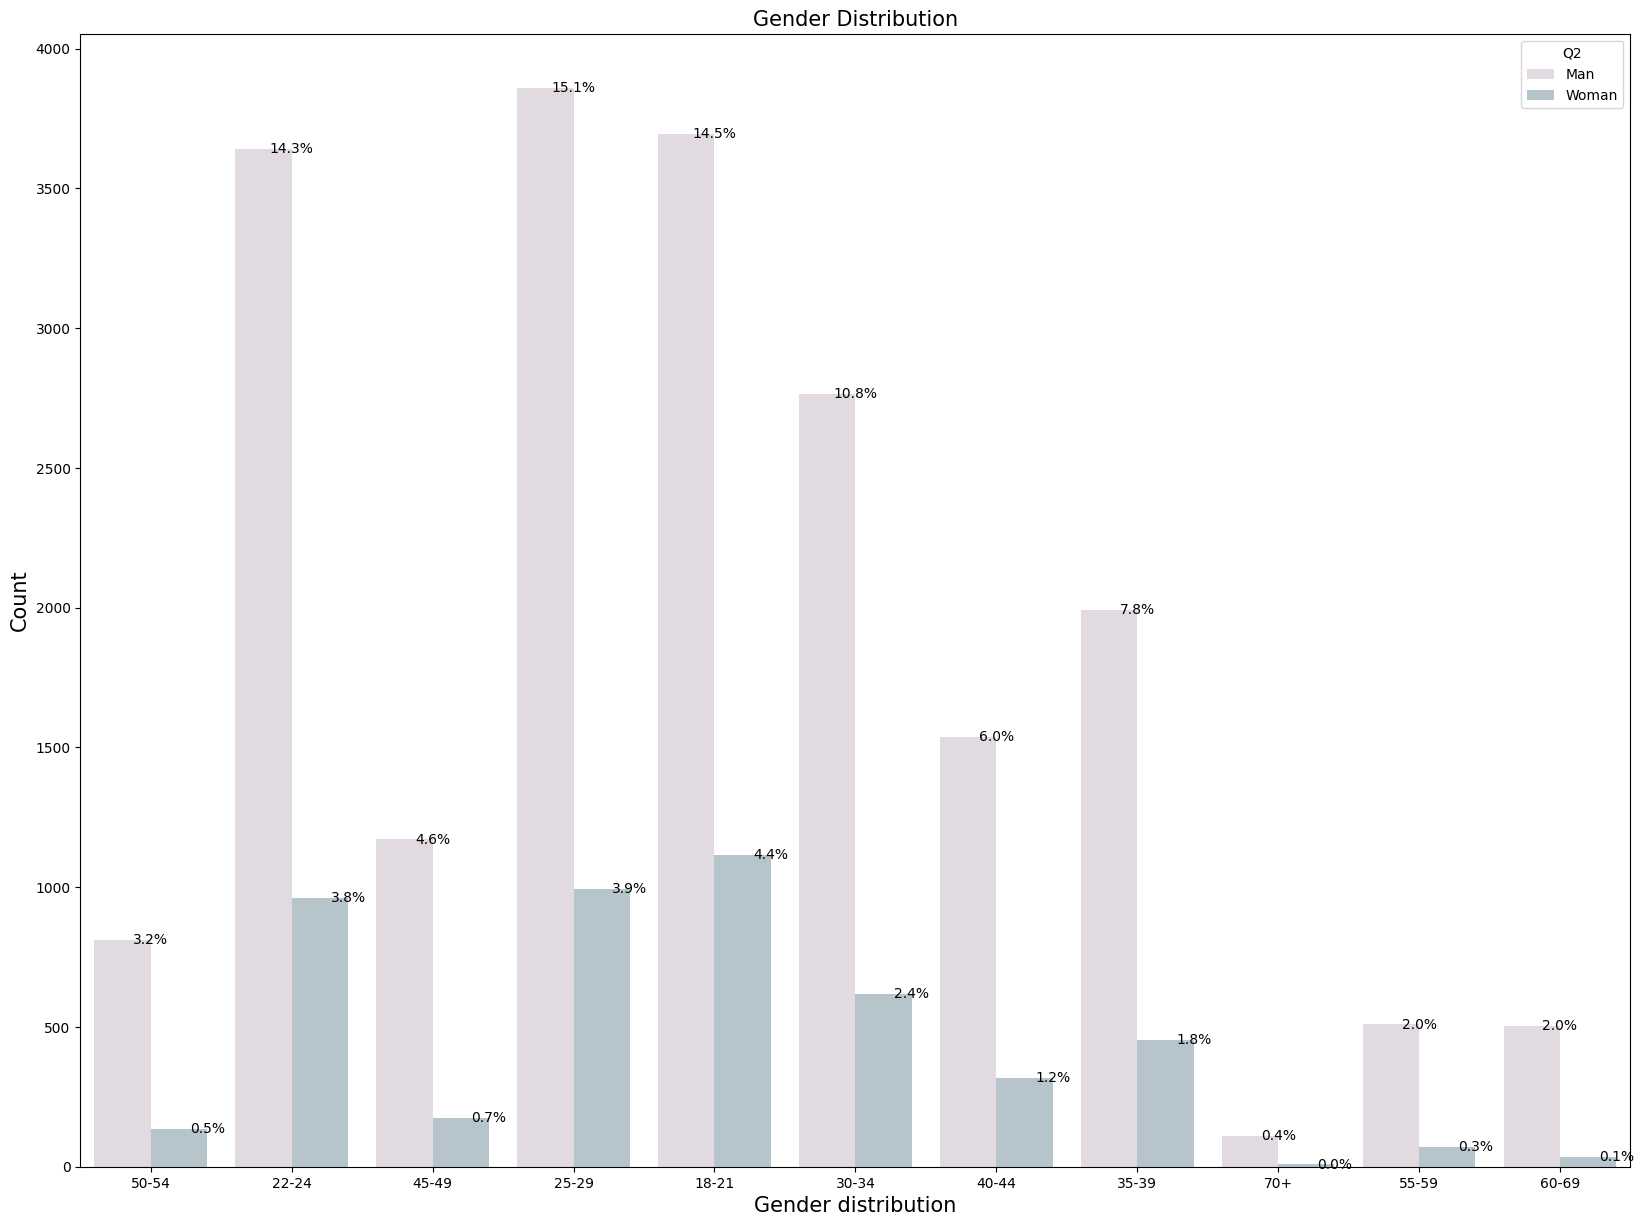

In [5]:
# set the color palette
cmap2 = cm.get_cmap('twilight',13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))

# Percentage of Man and Woman
plt.figure(figsize=(20, 15), dpi=100)
data = df_one[df_one["Q2"].isin(["Man","Woman"])]
ax02 = sns.countplot(x="Q1", data=data, hue='Q2',palette=colors1)
plt.title('Gender Distribution', fontsize=15)
for p in ax02.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(data.shape[0]))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax02.annotate(percentage, (x, y),ha='center',va='center')
plt.xlabel("Gender distribution",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

### Woman and Age Group

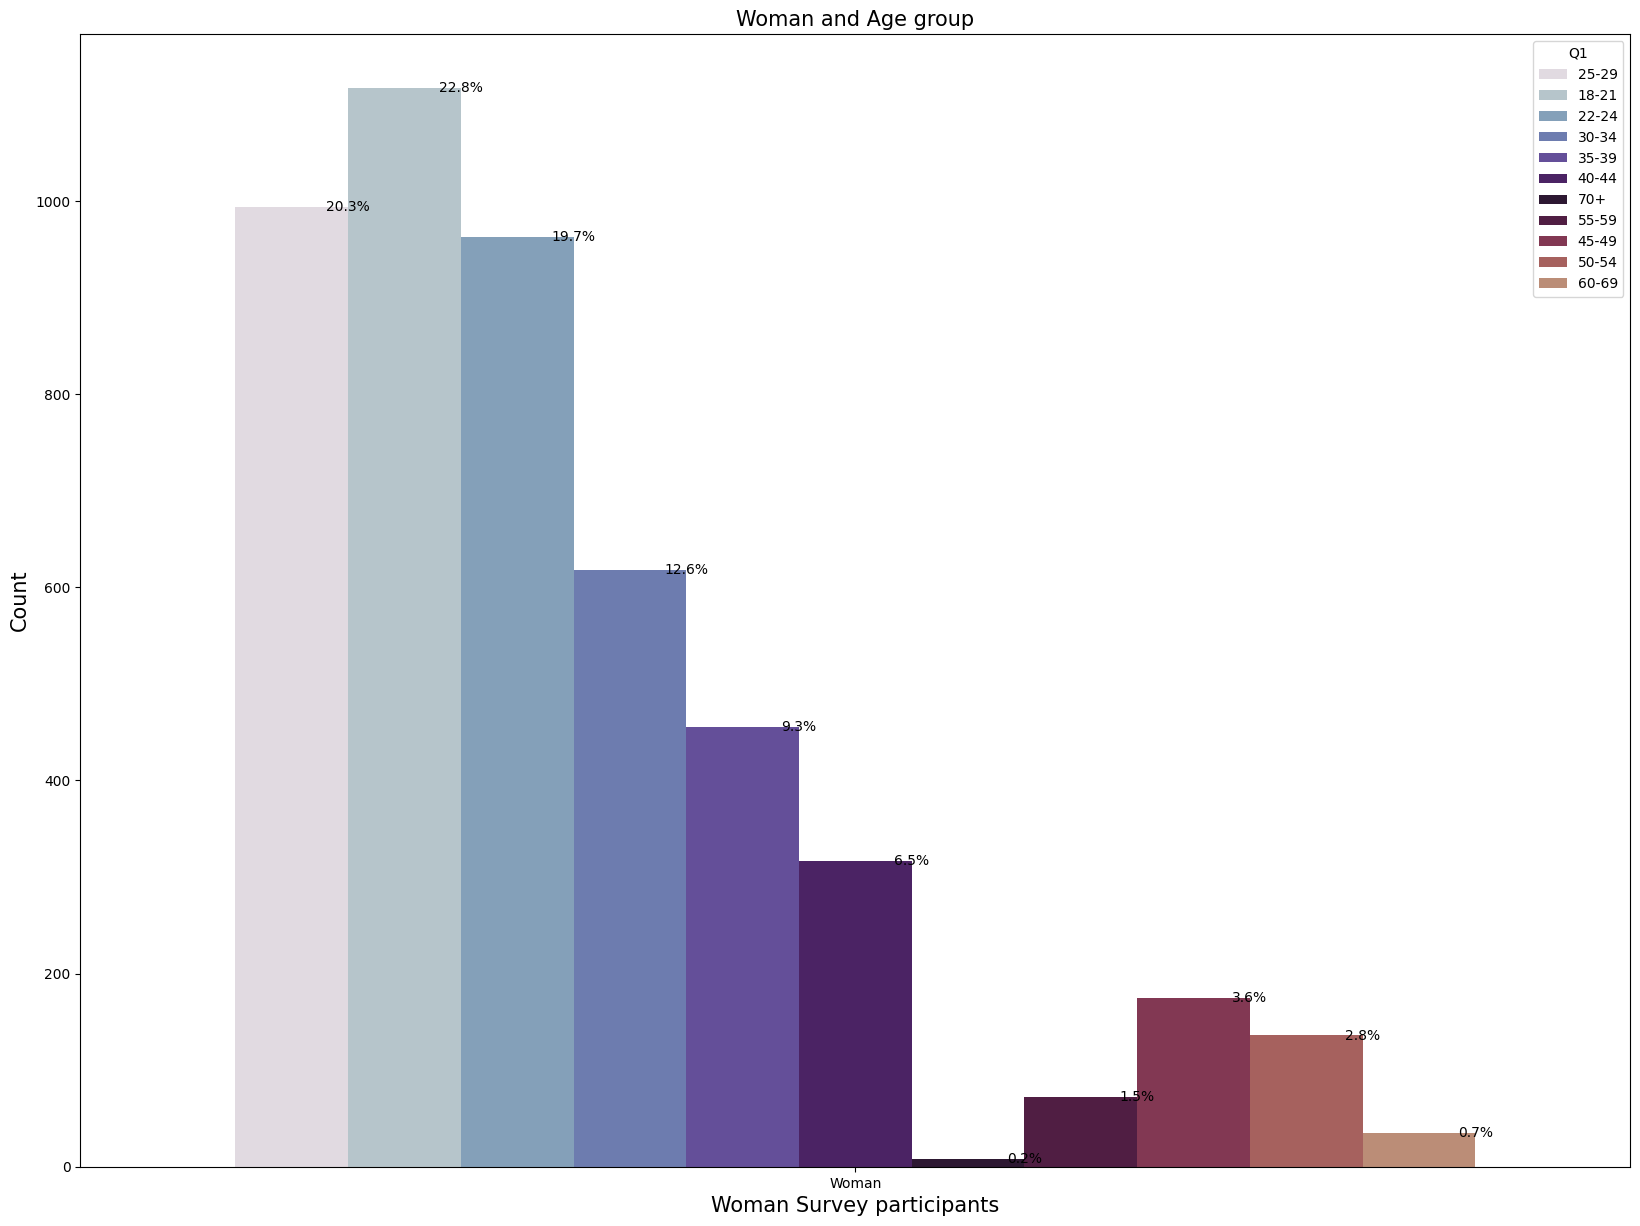

In [6]:
plt.figure(figsize=(20, 15), dpi=100)
data = df_one[df_one["Q2"]=="Woman"]
ax03 = sns.countplot(x="Q2", data=data, hue='Q1',palette=colors1)
plt.title('Woman and Age group', fontsize=15)
for p in ax03.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(data.shape[0]))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax03.annotate(percentage, (x, y),ha='center',va='center')
plt.xlabel("Woman Survey participants",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

### Education Distribution

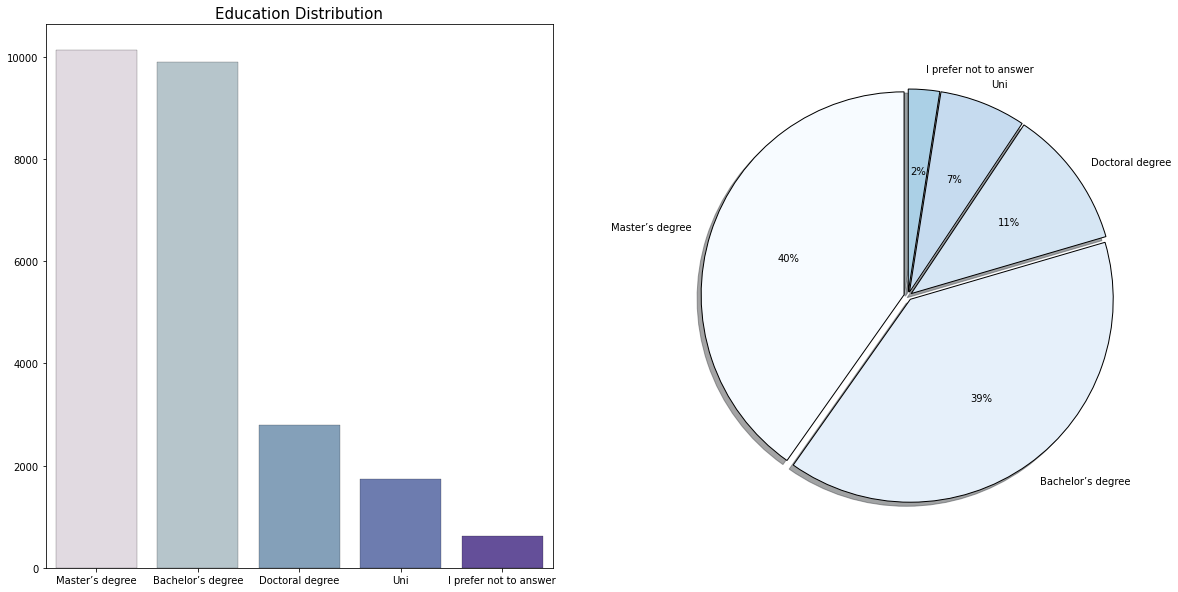

In [7]:
# Education of the survey Participants
    
df_one['Q4_one'] = ["Uni" if i == 'Some college/university study without earning a bachelor’s degree' else i for i in df_one['Q4']]
    
fig,ax2 = plt.subplots(1,2,figsize=(20,10))
c_ed = df_one['Q4_one'].value_counts().head()
sns.barplot(x=c_ed.index,y=c_ed.values,palette=colors1,edgecolor='black',linewidth=0.2,ax=ax2[0])
ax2[0].set_title('Education Distribution',fontsize=15)
ax2[1].pie(x=c_ed,labels=c_ed.index,colors=colors,autopct='%.0f%%',explode=[0.02 for i in c_ed.index],shadow=True,startangle = 90,
       wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"})

plt.show()

### Formal Education level and Programming Experience

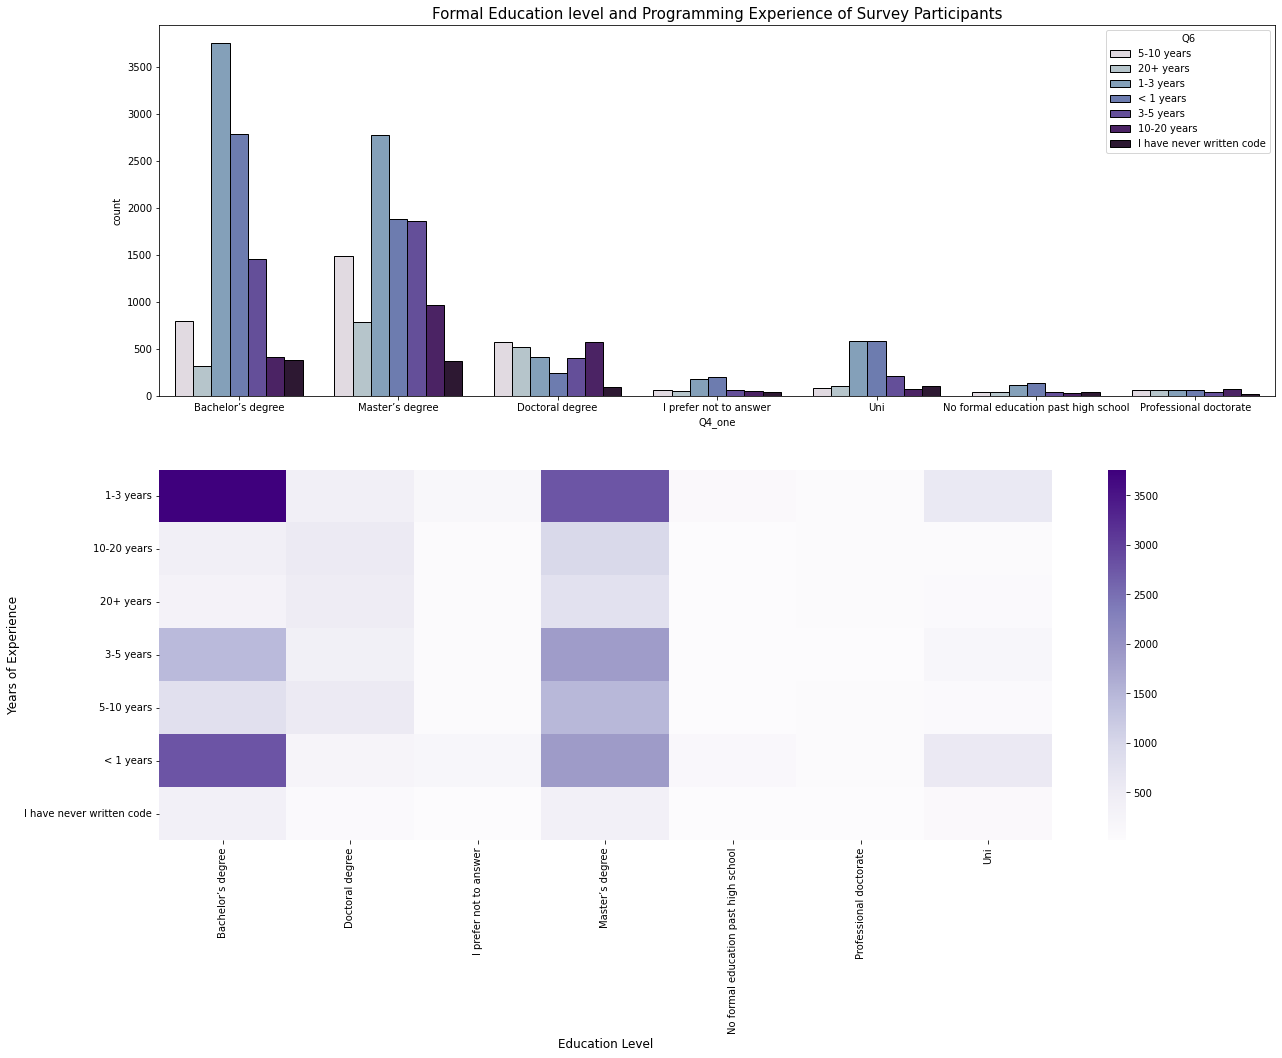

In [11]:
# Formal education level and Programming Experience
df_ans= df_one[1:]
figure,ax8=plt.subplots(2,1,figsize=(20,15))
sns.countplot(x='Q4_one',hue='Q6',ec='black',data=df_ans,ax=ax8[0],palette=colors1)
ax8[0].set_title("Formal Education level and Programming Experience of Survey Participants",fontsize=15)
h2= df_ans.pivot_table(index='Q4_one',columns='Q6',values='Q1',aggfunc='count')
sns.heatmap(h2.T,cmap='Purples',ax=ax8[1])
plt.xlabel('Education Level', fontsize = 12)
plt.ylabel('Years of Experience', fontsize = 12)

plt.show()

### Age by Deucation

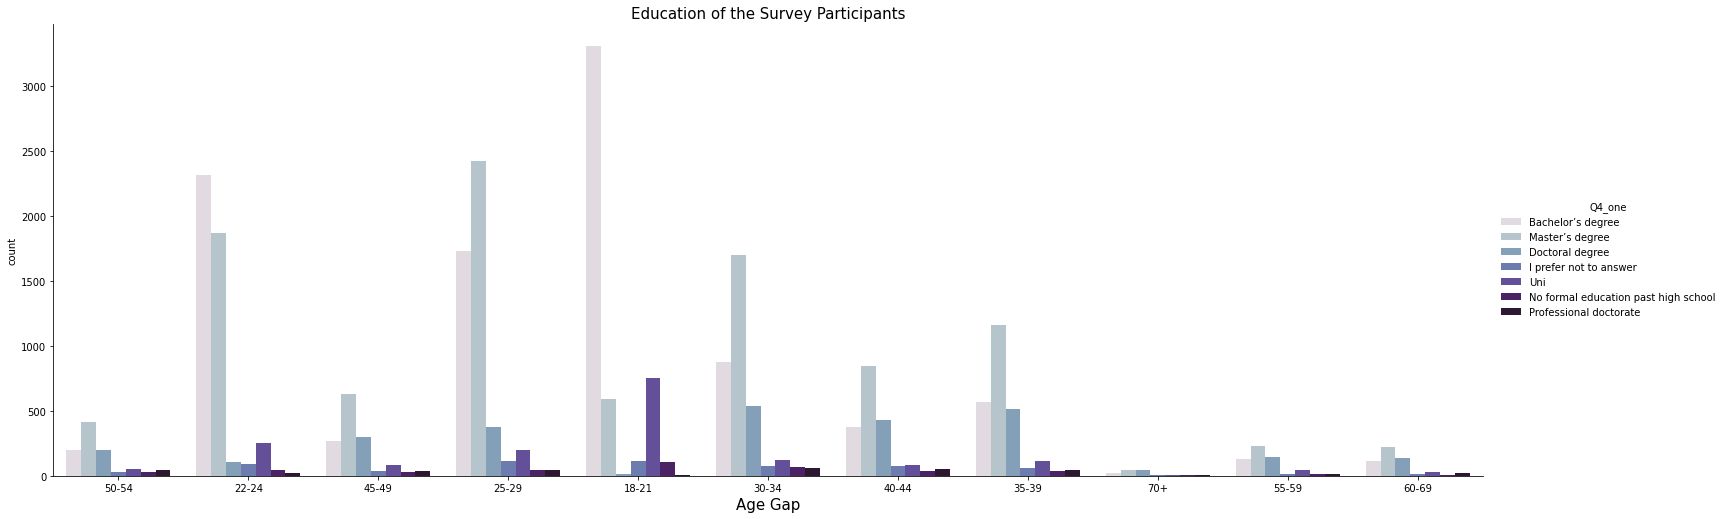

In [12]:
# Age by Education of the Survey Participants
sns.catplot(data=df_ans, 
            x='Q1', hue='Q4_one',
            kind='count',
            log=False, 
            height=7, aspect=3,palette=colors1)
plt.xlabel('Age Gap',fontsize=15)
plt.title('Education of the Survey Participants',fontsize=15)

plt.show()